In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv("C:\\Users\\muska\\OneDrive\\Desktop\\python\\python env\\new\\combined.csv")

In [3]:
df.head()

,Date,Tweet
0,2021-05-19 05:52:38,b'A group of social activists campaigning for ...
1,2021-05-19 05:48:21,b'RT @tfipost: Reports about blood clotting du...
2,2021-05-19 05:47:54,b'RT @diprjk: A #FrontlineWarrior of @NHMJK5 T...
3,2021-05-19 05:47:54,b'RT @mybmc: Tomorrow\xe2\x80\x99s list of cen...
4,2021-05-19 05:47:02,"b'No sir, it is a ROCKET science, which ths go..."


In [4]:
len(df)

25240

### cleaning of raw data 
This phase involves the deletion of words or characters that do not add value to the meaning of the text. Some of the standard cleaning steps are below:

In [5]:
df['Tweet']=df.Tweet.str.lower()
df.head()

,Date,Tweet
0,2021-05-19 05:52:38,b'a group of social activists campaigning for ...
1,2021-05-19 05:48:21,b'rt @tfipost: reports about blood clotting du...
2,2021-05-19 05:47:54,b'rt @diprjk: a #frontlinewarrior of @nhmjk5 t...
3,2021-05-19 05:47:54,b'rt @mybmc: tomorrow\xe2\x80\x99s list of cen...
4,2021-05-19 05:47:02,"b'no sir, it is a rocket science, which ths go..."


In [6]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', str(txt))
    #remove non-leter characters
    txt=re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    #remove placeholder
    txt=re.sub(r'{link}', '', txt)
    txt=re.sub(r"\[video\]", '',txt)
    #remove html reference characters
    txt=re.sub(r'&[a-z]+;', '', txt)
    # Remove urls with https
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove punctuations 
    txt=re.sub(r'[^\w\s]','',txt)
    #remove url with www or without www
    txt=re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', txt)
    return txt

In [7]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [8]:
df.head()

,Date,Tweet
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...


In [9]:
len(df)

25240

### Tokenization 

In [10]:
#tokenization
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df['tokens'] = df['Tweet'].apply(tknzr.tokenize)

In [11]:
df.head()

,Date,Tweet,tokens
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...,"[ba, group, of, social, activists, campaigning..."
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...,"[brt, reports, about, blood, clotting, due, to..."
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...,"[brt, a, frontlinewarrior, of, tabasum, ara, s..."
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...,"[brt, tomorrowxexxs, list, of, centres, only, ..."
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...,"[bno, sir, it, is, a, rocket, science, which, ..."


### Remove stopwords 

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muska\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['brt','ba','ji','amp'])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
#remove words that are in NLTK stopwords list
not_stopwords = ['not', 'no'] 
final_stop_words = set([word for word in stop_words if word not in not_stopwords])

#print(final_stop_words)

In [15]:
def tokens_without_sw(tokens):
    txt = [word for word in tokens if not word in stop_words]
    return txt

In [16]:
df['tokens']= df['tokens'].apply(lambda x: tokens_without_sw(x))

In [17]:
df.head()

,Date,Tweet,tokens
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...,"[group, social, activists, campaigning, xexxri..."
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...,"[reports, blood, clotting, due, covishield, at..."
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...,"[frontlinewarrior, tabasum, ara, shares, exper..."
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...,"[tomorrowxexxs, list, centres, specially, able..."
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...,"[bno, sir, rocket, science, ths, govt, unable,..."


### Stemming 

In [18]:
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()

# def stemming(tokens):
#     text = [ps.stem(word) for word in tokens]
#     return text

# tokens_stemmed= df['tokens'].apply(lambda x: stemming(x))
# tokens_stemmed.head()


0    [group, social, activist, campaign, xexxright,...
1    [report, blood, clot, due, covishield, attempt...
2    [frontlinewarrior, tabasum, ara, share, experi...
3    [tomorrowxexx, list, centr, special, abl, admi...
4    [bno, sir, rocket, scienc, th, govt, unabl, ex...
Name: tokens, dtype: object

### Lemmatization 

In [19]:
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tokens_lemmatized= df['tokens'].apply(lambda x: lemmatizer(x))
tokens_lemmatized.head()

0    [group, social, activist, campaigning, xexxrig...
1    [report, blood, clotting, due, covishield, att...
2    [frontlinewarrior, tabasum, ara, share, experi...
3    [tomorrowxexxs, list, centre, specially, abled...
4    [bno, sir, rocket, science, th, govt, unable, ...
Name: tokens, dtype: object

In [20]:
#combine words into single sentence
for i in range(len(tokens_lemmatized)):
    tokens_lemmatized[i]=" ".join(tokens_lemmatized[i])
df['clean_tweets']=tokens_lemmatized
df.head()   

,Date,Tweet,tokens,clean_tweets
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...,"[group, social, activists, campaigning, xexxri...",group social activist campaigning xexxright pu...
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...,"[reports, blood, clotting, due, covishield, at...",report blood clotting due covishield attempt d...
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...,"[frontlinewarrior, tabasum, ara, shares, exper...",frontlinewarrior tabasum ara share experience ...
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...,"[tomorrowxexxs, list, centres, specially, able...",tomorrowxexxs list centre specially abled admi...
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...,"[bno, sir, rocket, science, ths, govt, unable,...",bno sir rocket science th govt unable explore ...


### wordcloud 

In [21]:
#visualise the frequent words
from wordcloud import WordCloud
all_words=" ".join([sentence for sentence in df['clean_tweets']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

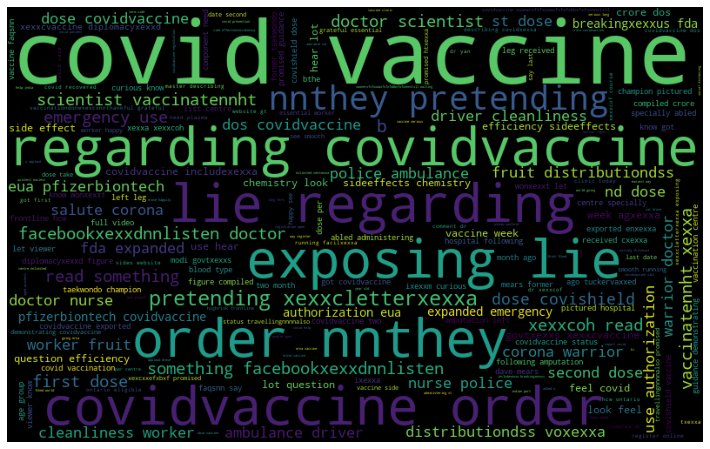

In [22]:
#plot the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
from textblob import TextBlob

In [24]:
def gettextSubjectivity(txt):
    return TextBlob(txt).subjectivity

In [25]:
def gettextPolarity(txt):
    return TextBlob(txt).polarity

In [26]:
df['Subjectivity']= df['clean_tweets'].apply(gettextSubjectivity)
df['Polarity']= df['clean_tweets'].apply(gettextPolarity)

In [27]:
df.head()

,Date,Tweet,tokens,clean_tweets,Subjectivity,Polarity
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...,"[group, social, activists, campaigning, xexxri...",group social activist campaigning xexxright pu...,0.066667,0.016667
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...,"[reports, blood, clotting, due, covishield, at...",report blood clotting due covishield attempt d...,0.375000,-0.125000
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...,"[frontlinewarrior, tabasum, ara, shares, exper...",frontlinewarrior tabasum ara share experience ...,0.000000,0.000000
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...,"[tomorrowxexxs, list, centres, specially, able...",tomorrowxexxs list centre specially abled admi...,0.452381,0.303571
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...,"[bno, sir, rocket, science, ths, govt, unable,...",bno sir rocket science th govt unable explore ...,0.400000,0.250000


In [28]:
def gettextAnalysis(a):
    if a<0:
        return "negative"
    elif a==0:
        return "neutral"
    else:
        return "positive"

In [29]:
df['label']=df['Polarity'].apply(gettextAnalysis)

In [30]:
df.head()

,Date,Tweet,tokens,clean_tweets,Subjectivity,Polarity,label
0,2021-05-19 05:52:38,ba group of social activists campaigning for t...,"[group, social, activists, campaigning, xexxri...",group social activist campaigning xexxright pu...,0.066667,0.016667,positive
1,2021-05-19 05:48:21,brt reports about blood clotting due to covis...,"[reports, blood, clotting, due, covishield, at...",report blood clotting due covishield attempt d...,0.375000,-0.125000,negative
2,2021-05-19 05:47:54,brt a frontlinewarrior of tabasum ara shares...,"[frontlinewarrior, tabasum, ara, shares, exper...",frontlinewarrior tabasum ara share experience ...,0.000000,0.000000,neutral
3,2021-05-19 05:47:54,brt tomorrowxexxs list of centres only for s ...,"[tomorrowxexxs, list, centres, specially, able...",tomorrowxexxs list centre specially abled admi...,0.452381,0.303571,positive
4,2021-05-19 05:47:02,bno sir it is a rocket science which ths govt ...,"[bno, sir, rocket, science, ths, govt, unable,...",bno sir rocket science th govt unable explore ...,0.400000,0.250000,positive


In [31]:
len(df)

25240

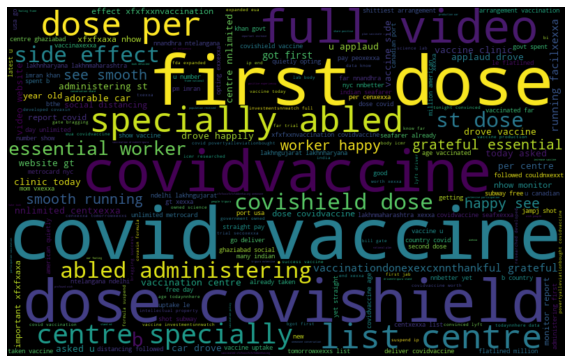

In [32]:
normal_words =' '.join([text for text in df['clean_tweets'][df['Polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

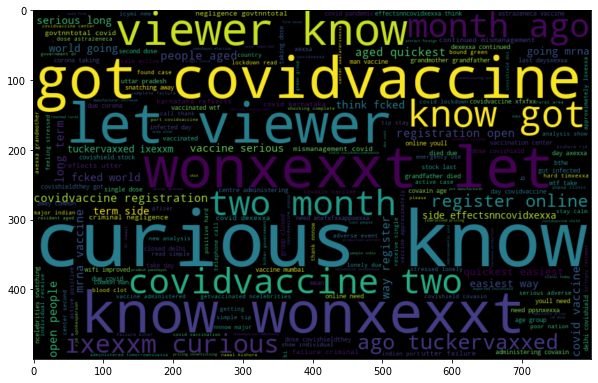

In [33]:
normal_words =' '.join([text for text in df['clean_tweets'][df['Polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

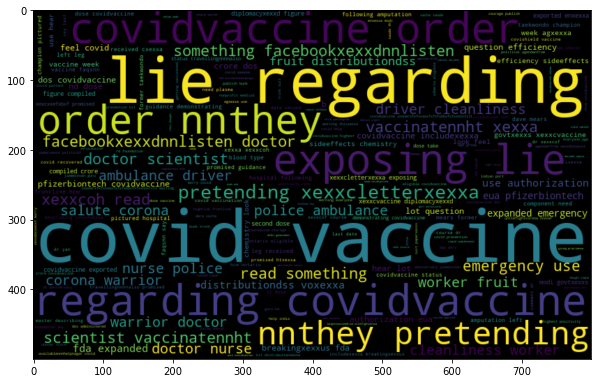

In [34]:
normal_words =' '.join([text for text in df['clean_tweets'][df['Polarity'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Extracting feature from cleam tweets 

In [35]:
# from sklearn.feature_extraction.text import CountVectorizer
# bow=CountVectorizer(min_df=5,max_df=0.8,max_features=5)
# X=bow.fit_transform(df['clean_tweets'])
# tweets_processed =X.toarray()


In [36]:
#tweets_processed[0]
# x=df['clean_tweets']
# y=df['label']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
x = vectorizer.fit_transform(df['clean_tweets'])
#y=vectorizer.transform(df['label'])

#x_test = vectorizer.transform(df['clean_tweets'])
# tweets_processed =x.toarray()
# tweets_processed[0]


### Input split 

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df['label'],random_state=42,test_size=0.25)

In [39]:
y_train=y_train.values.reshape(-1,1)

In [40]:
y_train.shape

(18930, 1)

In [41]:
#x_test=x_test.values.reshape(-1,1)
x_test.shape

(6310, 5121)

In [42]:
#x_train=x_train.reshape(-1,1)
x_train.shape

(18930, 5121)

In [43]:
y_test=y_test.values.reshape(-1,1)

In [44]:
y_test.shape

(6310, 1)

In [45]:
import time
from sklearn import svm
from sklearn.metrics import accuracy_score
#Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear',probability=True)
t0 = time.time()
classifier_linear.fit(x_train,y_train.ravel())
t1 = time.time()
pred_test = classifier_linear.predict(x_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
#report = classification_report(y_test, prediction_linear, output_dict=True)
# print('positive: ', report['positive'])
# print('negative: ', report['negative'])



Training time: 177.760239s; Prediction time: 6.656585s


In [46]:
classifier_linear.score(x_test,y_test)

0.9625990491283677

In [47]:
classifier_linear.score(x_train,y_train)

0.9833069202324353

In [48]:
classifier_linear.score(x,df['label'])

0.9781299524564184

In [49]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_test, output_dict=True)

In [50]:
report

{'negative': {'precision': 0.9666110183639399,
  'recall': 0.8489736070381232,
  'f1-score': 0.9039812646370023,
  'support': 682},
 'neutral': {'precision': 0.9542004710808689,
  'recall': 0.9959027588090685,
  'f1-score': 0.9746057203956162,
  'support': 3661},
 'positive': {'precision': 0.9783068783068783,
  'recall': 0.9400101677681749,
  'f1-score': 0.9587762509722583,
  'support': 1967},
 'accuracy': 0.9625990491283677,
 'macro avg': {'precision': 0.9663727892505624,
  'recall': 0.9282955112051222,
  'f1-score': 0.9457877453349589,
  'support': 6310},
 'weighted avg': {'precision': 0.9630564609795401,
  'recall': 0.9625990491283677,
  'f1-score': 0.9620379794791155,
  'support': 6310}}

In [51]:
#create a pickle file using serialization
import pickle
pickle_out=open("classifier_linear.pkl","wb")
pickle.dump(classifier_linear,pickle_out)
pickle_out.close()

In [52]:
import numpy as np

In [53]:
#create a pickle file for vectorizer
import pickle
pickle_ou=open("vectorizer.pkl","wb")
pickle.dump(vectorizer,pickle_ou)
pickle_ou.close()

In [54]:
new="covishield is better than covaxin" 

In [55]:
f=vectorizer.transform([new])

In [56]:
classifier_linear.predict_proba(f)

array([[1.71976898e-08, 1.74540610e-08, 9.99999965e-01]])